### Building a basic chatbot with langgraph (graph API)

In [30]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph , START ,END
from langgraph.graph.message import add_messages  # this are called reducers(they append)

In [31]:
class State(TypedDict):
   #  Messagses have the type "list". The 'add_messages' function
   # in the annotation defines how this state key should be replaced
   # in this particular case it appends the messages instad of overwriting them
   messages:Annotated[list,add_messages] 

graph_builder = StateGraph(State)

In [32]:
graph_builder

In [33]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [34]:
# Defining the LLMs
from langchain_groq import ChatGroq

from langchain.chat_models import init_chat_model

llm = ChatGroq(model="deepseek-r1-distill-llama-70b")

In [35]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001EB6243DF00>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001EB6243D360>, model_name='deepseek-r1-distill-llama-70b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [36]:

#node functionality
def chatbot(state:State):
    return{"messages":[llm.invoke(state["messages"])]}
    

In [37]:
graph_builder = StateGraph(State)


#adding node
graph_builder.add_node("My_Chatbot",chatbot)
#adding edges
graph_builder.add_edge(START,"My_Chatbot")
graph_builder.add_edge("My_Chatbot",END)


## compile the graph
graph = graph_builder.compile()

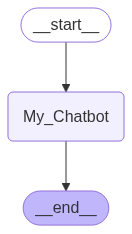

In [38]:
#visualize the graph

from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [39]:
response = graph.invoke({"messages":"Hi"})

In [40]:
response["messages"]

[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='3bca010a-09e7-4b6e-8354-6361181bc832'),
 AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.071141166, 'prompt_time': 0.00940933, 'queue_time': 0.048239107, 'total_time': 0.080550496}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e2a40068-a536-4892-93d3-edeb5eb675ea-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})]

In [41]:
#reading the perfect message

response["messages"][-1].content

'<think>\n\n</think>\n\nHello! How can I assist you today? 😊'

#displaying the information

#displaying

In [45]:
for event in graph.stream({"messages": "Hi how are you"}):
    for value in event.values():
        print(value["messages"][-1].content)

<think>

</think>

Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊


# adding tools to this chatbot